# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
# Your code here. 
import pandas as pd
import seaborn as sns
from scipy import stats
student_data = pd.DataFrame({'X': [17,51,27,21,36,48,19,26,54,30], 'Y': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

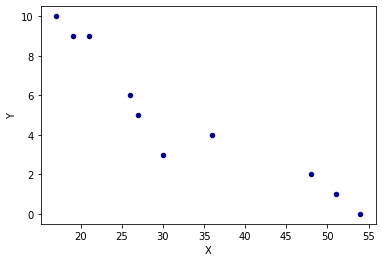

In [2]:
# Your code here.

student_data.plot.scatter(x = 'X', y = 'Y',c='DarkBlue')

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [3]:
# Your response here. 
Si existe una tendencia, si el alumno es más joven tiende a tener más minutos de retardo, en cambio los de mayr edad suelen ser más puntuales. 

SyntaxError: invalid syntax (<ipython-input-3-4cea0c956191>, line 2)

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [4]:
# Your response here.
covarianza = student_data.cov()
correlacion = student_data.corr()
print('Covarianza')
print(covarianza)
print('Correlación')
print(correlacion)

Covarianza
            X          Y
X  187.655556 -45.566667
Y  -45.566667  12.544444
Correlación
          X         Y
X  1.000000 -0.939163
Y -0.939163  1.000000


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [5]:
# Your response here.
x = student_data['X']
y = student_data['Y']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))

The slope is: -0.2428207709159808
The intercept is: 12.888803363135768


Plot your regression model on your scatter plot.

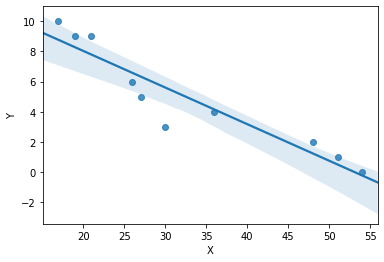

In [6]:
# Your code here.
sns.regplot(x="X", y="Y", data=student_data)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

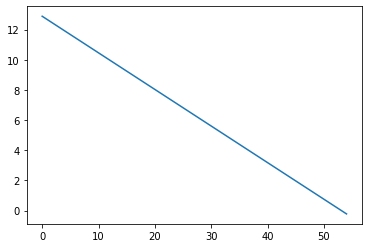

In [7]:
# Your response here. 
model = [(intercept + x*slope) for x in range(55)]
sns.lineplot(x = [x for x in range(55)], y = model )

In [9]:
No estoy muy convencida del gráfico de seaborn ya que si replico el modelo de regresión lineal con los datos obtenidos con scipy
la intersección es diferente, en general creo que un modelo lineal es lo más adecuado a este probema por que se ve una tendencia clar
de los datos.

SyntaxError: invalid syntax (<ipython-input-9-2eaf2d7c75fb>, line 1)

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [8]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('./vehicles.csv')
vehicles.dtypes

Make                        object
Model                       object
Year                         int64
Engine Displacement        float64
Cylinders                  float64
Transmission                object
Drivetrain                  object
Vehicle Class               object
Fuel Type                   object
Fuel Barrels/Year          float64
City MPG                     int64
Highway MPG                  int64
Combined MPG                 int64
CO2 Emission Grams/Mile    float64
Fuel Cost/Year               int64
dtype: object

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [10]:
# Your response here. 
vehicles.corr()['CO2 Emission Grams/Mile']
#La más importante según la correlación es la variable 'Fuel Barrels/Year' y la que aporta menos es 'Year'

Year                      -0.222300
Engine Displacement        0.803520
Cylinders                  0.752393
Fuel Barrels/Year          0.986189
City MPG                  -0.894139
Highway MPG               -0.926405
Combined MPG              -0.926229
CO2 Emission Grams/Mile    1.000000
Fuel Cost/Year             0.930865
Name: CO2 Emission Grams/Mile, dtype: float64

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

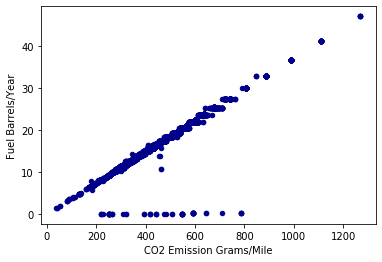

In [11]:
# Your response here. 
vehicles.plot.scatter(x = 'CO2 Emission Grams/Mile', y = 'Fuel Barrels/Year',c='DarkBlue')
# Utilizaré una regresión lineal para describir esta relación.

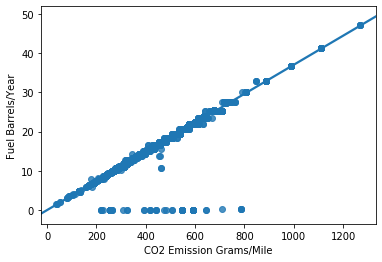

In [12]:
sns.regplot(x = 'CO2 Emission Grams/Mile', y = 'Fuel Barrels/Year', data=vehicles)

In [14]:
x = vehicles['CO2 Emission Grams/Mile']
y = vehicles['Fuel Barrels/Year']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))
print ('The p-value is: ' + str(p_value))
print ('The r-value is: ' + str(r_value))

The slope is: 0.0370028130682747
The intercept is: 0.021013852496860608
The p-value is: 0.0
The r-value is: 0.9861886621428729


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
El coeficiente de correlación del modelo con los datos es casi 1 por lo que se puede concluir que el modelo lineal tiene un buena ajuste
a los datos

In [ ]:
# Your response here. 

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [7]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [1]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 